# Q1 给定一组参数，s =40,x =40,t = 0.25,r=0.05, sigma=0.20,使用BS公式计算着看涨期权的价格，保持其他参数不变，调整S（股票当前价格），来显示看涨期权的价格和S之间的关系（绘制图形）

$$
c = S_0N(d_1) - Xe^{-rT}N(d_2)  
$$  


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#期权定价BS
# 看涨期权定价公式
from scipy import stats
import numpy as np
def bs_call(S,X,T,r,sigma):
    d1 = (np.log(S/X) + (r+0.5*pow(sigma,2))*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    call_price = S*stats.norm.cdf(d1,0,1) - X*np.exp(-r*T)*stats.norm.cdf(d2,0,1)
    return call_price

In [10]:
s = np.arange(1, 100, 1)
c = bs_call(s, 40, 0.25, 0.05, 0.2)

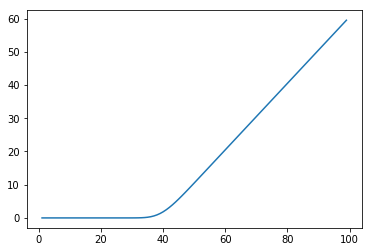

In [11]:
plt.plot(s, c)

# Q2 股票A当前价格为38.5美元，看涨期权和看跌期权目前行权价均为37美元，如果无风险利率为3.2%，期权有效期6个月，股票A的波动率为0.25,欧式看涨和看跌期权的价格分别为多少？

$$
c = S_0N(d_1) - Xe^{-rT}N(d_2)  
$$  
 
$$
p = Xe^{-rT}N(-d_2) - S_0N(-d_1)d_2
$$  



In [20]:
# 看跌期权定价公式
from scipy import stats
import numpy as np
def bs_put(S,X,T,r,sigma):
    d1 = (np.log(S/X) + (r+0.5*pow(sigma,2))*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    call_price = X*np.exp(-r*T)*stats.norm.cdf(-d2,0,1) - S*stats.norm.cdf(-d1,0,1)*d2
    return call_price
def bs_call(S,X,T,r,sigma):
    d1 = (np.log(S/X) + (r+0.5*pow(sigma,2))*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    call_price = S*stats.norm.cdf(d1,0,1) - X*np.exp(-r*T)*stats.norm.cdf(d2,0,1)
    return call_price

In [21]:
p = bs_put(38.5, 37, 0.5, 0.032, 0.25)
c = bs_call(38.5, 37, 0.5, 0.032, 0.25)

In [24]:
print(f'看跌期权价格：{p}\n看涨期权价格：{c}')

看跌期权价格：11.93940457007854
看涨期权价格：3.8114594072676162


# Q3 假设一个投资持有一个欧式看跌期权，当前期权行权价格为45，期权费用为2元，绘制出看跌期权买方和卖方收益函数

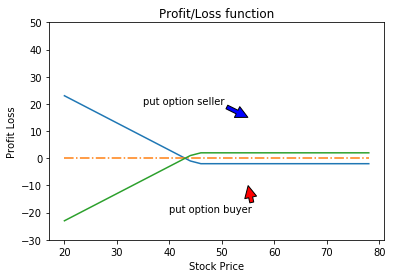

In [18]:
# 绘图看涨期权交易双方收益图
# 定义相关函数
#看跌期权
def pay_off_call(ST,x,c):
    return (x -ST + abs(x -ST))/2 - c
import scipy as sp
s = np.arange(20,80,2)
x = 45; c=2
profit = pay_off_call(s,x,c)
y2 = np.zeros(len(s))
plt.ylim(-30,50)
plt.plot(s,profit)
plt.plot(s,y2,'-.')
plt.plot(s,-profit)
plt.title('Profit/Loss function')
plt.xlabel('Stock Price')
plt.ylabel('Profit Loss')
plt.annotate('put option seller',xy=(55,15),xytext=(35,20), arrowprops=dict(facecolor='blue',shrink=0.01),)
plt.annotate('put option buyer',xy=(55,-10),xytext=(40,-20), arrowprops=dict(facecolor='red',shrink=0.01),)
plt.show()